### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/univariate">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/univariate.git'

## Example

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, sys
from scipy import stats
import matplotlib.pyplot as plt

sys.path.append('/content/univariate')
from Univariate import *

**<font size=5 color='blue'> UnivariateOutliers </font>**

---

`UnivariateOutliers` determines univariate outliers within one variable at a time. Any identified outlier, is capped to the lower/upper value.

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [2]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names

Randomly replace numerical value with `np.nan`.

In [3]:
np.random.seed(0)
NaN = np.random.random(X.shape)<0.1
X = pd.DataFrame(np.where(NaN, np.nan, X), columns=cols).iloc[:,:5]

Add non-numerical and **NaN** fields

In [4]:
X['only_str'], X['all_nan'] = 'only_str', np.nan

Univariate outlier detection methods
- "**pct**"   : Percentile
- "**sigma**" : Z-score
- "**iqr**"   : Interquartile range 
- "**grubb**" : Grubbs' test (Grubbs 1969 and Stefansky 1972)
- "**gesd**"  : Generalized Extreme Studentized Deviate
- "**mad**"   : Median Absolute Deviation
- "**mae**"   : Mean Absolute Error

In [5]:
model = UnivariateOutliers().fit(X)

/Users/administrator/Desktop/Python Projects/++ mtest ++/Univariate.py:1056: UserWarning: Data variables must be numerical. List of non-numerical variables: ['only_str']
  warn(f'Data variables must be numerical. '
/Users/administrator/Desktop/Python Projects/++ mtest ++/Univariate.py:1065: UserWarning: Data variables must contain numerical values more than 10 records. List of invalid variables: ['all_nan']
  warn(f'Data variables must contain numerical '


Excluded variable(s)

In [6]:
model.exclude

{'non_numeric': ['only_str'], 'min_numeric': ['all_nan']}

Summary of results

In [7]:
model.info

,variable,lower,upper,n_lower,n_upper,n_outlier,n_notnan,p_outlier
0,mean radius,5.575586,24.727001,0,5,5,510,0.009804
1,mean texture,8.188421,32.457089,0,3,3,513,0.005848
2,mean area,-90.415776,1669.944390,0,12,12,506,0.023715
3,mean smoothness,0.054784,0.140480,1,3,4,498,0.008032
4,mean perimeter,35.200213,161.368201,0,5,5,505,0.009901


In [8]:
model.capped_X.head(5)

,mean radius,mean texture,mean area,mean smoothness,mean perimeter
0,17.99,10.38,1001.0,0.11840,122.80
1,20.57,17.77,1326.0,NaN,132.90
2,19.69,21.25,1203.0,0.10960,130.00
3,11.42,20.38,386.1,0.14048,77.58
4,20.29,14.34,1297.0,0.10030,135.10


**<font size=5 color='blue'> chi2_test </font>**

---

A chi-square goodness of fit test determines whether sample data fits a particular population.

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [9]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

$H_{0}$ : data follows a normal distribution.

$H_{A}$ : data does not follow a normal distribution.

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [10]:
chi2_test(x, dist="norm")

Chi2_Test(cv=2.3866122767931617, df=7, pvalue=0.9353905800003721, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

If shape-related parameters are known e.g. $\mu$ or $\sigma$ or true population, we can freeze them for the instance of the distribution.

In [11]:
chi2_test(x, dist=stats.norm(loc=2, scale=2))

Chi2_Test(cv=2.852688694120608, df=7, pvalue=0.8982870469874376, dist='norm', params={'args': (), 'kwds': {'loc': 2, 'scale': 2}})

If $\alpha$ is 5% (0.05), we can not reject the null hypothesis (0.94 > 0.05). Or we can determine the critical value as follows:

In [12]:
print('Critical Value = {:,.4f}'.format(stats.chi2.ppf(0.95, 7)))

Critical Value = 14.0671


We cannot reject the null hypotheis since $\chi^{2}$ is 2.389, which is less than $\chi^{2}_{\alpha=0.05, df=7}$ = 14.0671

**<font size=5 color='blue'> qq_plot </font>**

---

Standard quantile-quantile (Q-Q) plot (Wilk and Gnanadesikan, 1968) is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other [wikipedia](https://en.wikipedia.org/wiki/Q–Q_plot)

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [13]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

See whether `x` follows normal or uniform distribution.

In [14]:
qq_plot(x, dist="norm")

QQ_plot(r=0.9998759256965546, cv=0.6020687774273007, rmse=0.06358873382864735, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

In [15]:
qq_plot(x, dist="uniform")   

QQ_plot(r=0.9717582798499491, cv=0.6020687774273007, rmse=1.239596599563976, dist='uniform', params=(-3.5451855128533003, 10.93763361798046))

In this case, "**norm**" returns higher value of `r` along with smaller value of `mse`, thus we could say that a random variable `x`, has a distribution similar to a normal random distribution, $N(\mu=2,\sigma=2)$. However, visualizing a Q-Q plot is highly recommended as indicators can sometimes be inadequate to conclude "**goodness of fit**" of both distributions.

**<font size=5 color='blue'> MatchDist </font>**

---

Matching distribution with data by using following methods:
- Chi-Square Test
- Kolmogorov-Smirnov Test
- Q-Q plot

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [16]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names
X = pd.DataFrame(X, columns=cols)

In [17]:
model = MatchDist().fit(X)

//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
//anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:7248: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
//anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/administrator/Desktop/Python Projects/++ mtest ++/Univariate.py:326: RuntimeWarning: divide by zero encountered in true_divide
  cv = ((observe-expect)**2/expect).sum()


Summary of results

In [18]:
model.info.sample(5)

,variable,chi2_cv,chi2_pvalue,chi2_dist,ks_statistic,ks_pvalue,ks_dist,qq_r,qq_rmse,qq_dist
13,mean radius,25.851068,0.000535,lognorm,0.045726,0.179624,lognorm,0.996762,0.347696,gamma
23,worst perimeter,31.142293,0.000059,gamma,0.059028,0.036411,gamma,0.997618,2.848099,gamma
11,worst smoothness,6.112972,0.526622,tukeylambda,0.023592,0.909428,tukeylambda,0.999361,0.001399,gamma
21,worst radius,25.767677,0.000554,lognorm,0.047120,0.154853,lognorm,0.996939,0.463483,beta
17,worst texture,8.285968,0.308054,beta,0.027294,0.790365,beta,0.999050,0.347781,beta


**result** (Attribute) contains results from `chi2` (Chi-Square), `ks` (Kolmogorov-Smirnov), and `qq` (QQ plot) in the form of `namedtuple`.

In [19]:
model.result["worst radius"]

Methods(chi2=Chi2_Test(cv=25.76767706598165, df=7, pvalue=0.0005541386341557653, dist='lognorm', params=(0.4626150181982213, 6.152042524211384, 9.094988402008937)), ks=KsTest(statistic=0.047120418957146804, pvalue=0.1548525443196192, dist='lognorm', params=(0.4626150181982213, 6.152042524211384, 9.094988402008937)), qq=QQ_plot(r=0.9969393676969815, cv=0.6020687774273007, rmse=0.4634834777454867, dist='beta', params=(3.3663897880196787, 10539078.009124523, 7.632417808869157, 27046340.48266547)))

To visualize the distribution, use **`plotting`** function.

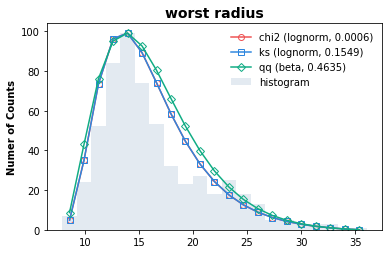

In [20]:
model.plotting("worst radius")

**<font size=5 color='blue'> Descriptive </font>**

---

**Descriptive statistics** are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis, and skewness [investopedia](https://www.investopedia.com/terms/d/descriptive_statistics.asp)

We use the breast cancer wisconsin dataset (`load_breast_cancer`) from the previous example.

In [21]:
model = Descriptive().fit(X)

Summary of results (Attributes)
- **num_info** (numerical)
- **str_info** (non-numerical)

In [22]:
model.num_info.iloc[:,:2]

variable,area error,compactness error
unique,528.000000,541.000000
missing,0.000000,0.000000
mean,40.337079,0.025478
std,45.451013,0.017892
fisher skew,5.432816,1.897202
galton skew,0.511339,0.239029
kurtosis,48.767196,5.050966
min,6.802000,0.002252
25%,17.850000,0.013080
50%,24.530000,0.020450


**num_info_** (Attribute) contains descriptive statistics of all variables in the form of `namedtuple`.

In [23]:
model.num_info_['mean texture']

DescStats(variable='mean texture', unique=479, missing=0, mean=19.289648506151142, std=4.297254637090421, f_skewness=0.6487335672867015, g_skewness=0.0515097690941384, kurtosis=0.74114542022429, min=9.71, pct25=16.17, pct50=18.84, pct75=21.8, max=39.28, iqr=5.629999999999999, lower=7.836020569387409, upper=32.52414510138002, n_lower=0, n_upper=3)

To visualize the distribution, use **`plotting`** function (powered by **`DescStatsPlot`**).

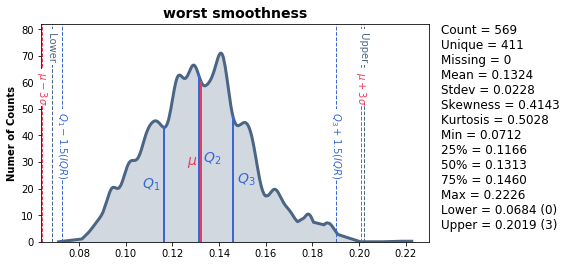

In [24]:
model.plotting("worst smoothness")
plt.show()

Alternatively, we can use **`DescStatsPlot`** to visualize the results from **`Descriptive`**.

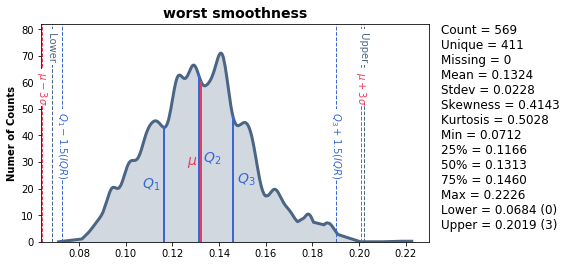

In [25]:
dStats = DescStatsPlot(X, model.num_info_)
dStats.plotting("worst smoothness")
plt.tight_layout(); plt.show()

**<font size=5 color='blue'> Compare2samp </font>**

---

Determine goodness of fit between two sets of data by using following methods:
- Chi-Square Test
- Kolmogorov-Smirnov Test (**scipy.stats.ks_2samp**)

In [875]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
random_X = X.sample(100).copy()

In [901]:
model = Compare2samp(frac=0.005).fit(X, random_X)

Summary of results

In [902]:
model.info.head()

,chi2_cv,chi2_df,chi2_pvalue,chi2_bins,ks_stat,ks_pvalue,dtype
variable,,,,,,,
pclass,0.0005,1,0.9818,3,0.0068,1.0000,int32
age,0.1843,6,0.9999,9,0.0717,0.6972,float32
sibsp,0.0326,4,0.9999,7,0.0356,0.9995,int32
parch,0.0319,3,0.9985,6,0.0445,0.9886,int32
fare,0.0389,2,0.9807,5,0.0767,0.6148,float32


To visualize Chi-Square Goodness of Fit, use `plotting`.

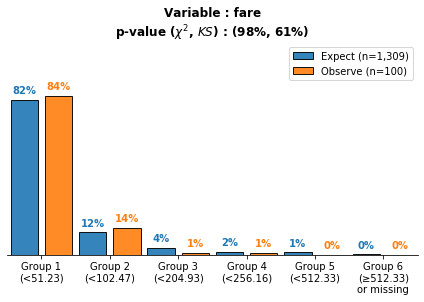

In [904]:
var = np.random.choice(list(model.result.keys()))
ax = model.plotting(var)